In [1]:
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyflux as pf
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize': (12,8)})

In [3]:
date_parser = lambda x: pd.datetime.strptime(x, "%d/%m/%Y 12:00:00 a.m.")
df = pd.read_csv('data/datasetRofex2.csv',
                 parse_dates=['Fecha'],
                 index_col='Fecha',
                 date_parser=date_parser)

df['retorno'] = df['Cierre'].pct_change()

In [4]:
df.head()

,Id,Open,High,Low,Last,Cierre,Aj.Dif.,Mon.,OI.Vol.,OI.Dif.,Vol.Ope.,Unidad,DolarB.N.,DolarItau.,Dif.Sem,retorno
Fecha,,,,,,,,,,,,,,,,
2004-01-05,1,0.0,0.0,0.0,0.0,221.0,13.0,D,0.0,0.0,0,TONS,2.920,2.905,-221.0,NaN
2004-01-06,2,0.0,0.0,0.0,0.0,221.0,0.0,D,0.0,0.0,0,TONS,2.880,2.870,-221.0,0.000000
2004-01-07,3,0.0,0.0,0.0,0.0,219.0,-2.0,D,0.0,0.0,0,TONS,2.865,2.882,-219.0,-0.009050
2004-01-08,4,0.0,0.0,0.0,0.0,220.0,1.0,D,0.0,0.0,0,TONS,2.887,2.884,-220.0,0.004566
2004-01-09,5,0.0,0.0,0.0,0.0,220.0,0.0,D,0.0,0.0,0,TONS,2.892,2.900,-220.0,0.000000


In [6]:
arima_one = pf.ARIMA(data=df['retorno'].dropna().values, ar=1, ma=1, family=pf.Normal())
arima_one_fit = arima_one.fit('MLE')

In [7]:
arima_one_fit.summary()

Normal ARIMA(1,0,1)                                                                                       
======================================================= ==================================================
Dependent Variable: Series                              Method: MLE                                       
Start Date: 1                                           Log Likelihood: 10908.5896                        
End Date: 3852                                          AIC: -21809.1792                                  
Number of observations: 3852                            BIC: -21784.1539                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0002     0.0003     0.5182   0.6043   (-0.0005 | 0.0008)       
AR(1)                                

In [9]:
arima_two = pf.ARIMA(data=df['retorno'].dropna().values, ar=2, ma=2, family=pf.Normal())
arima_two_fit = arima_two.fit('MLE')

In [10]:
arima_two_fit.summary()

Normal ARIMA(2,0,2)                                                                                       
======================================================= ==================================================
Dependent Variable: Series                              Method: MLE                                       
Start Date: 2                                           Log Likelihood: 10906.321                         
End Date: 3852                                          AIC: -21800.642                                   
Number of observations: 3851                            BIC: -21763.1054                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0001     0.0002     0.5146   0.6068   (-0.0004 | 0.0006)       
AR(1)                                

In [11]:
garch = pf.GARCH(data=df['retorno'].dropna().values, p=1, q=1)
garch_fit = garch.fit('MLE')
garch_fit.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: Series                              Method: MLE                                       
Start Date: 1                                           Log Likelihood: 11162.449                         
End Date: 3852                                          AIC: -22316.898                                   
Number of observations: 3852                            BIC: -22291.8726                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0                                                              
q(1)                                 

In [12]:
def predict(mu, var, size=20):
    normal_samples = np.random.standard_normal(size=size)
    return (mu + normal_samples * np.sqrt(var))

In [15]:
garch.predict(h)

,Series
3853,0.000118
3854,0.000132
3855,0.000144
3856,0.000154
3857,0.000162
3858,0.000170
3859,0.000175
3860,0.000181
3861,0.000185
3862,0.000188


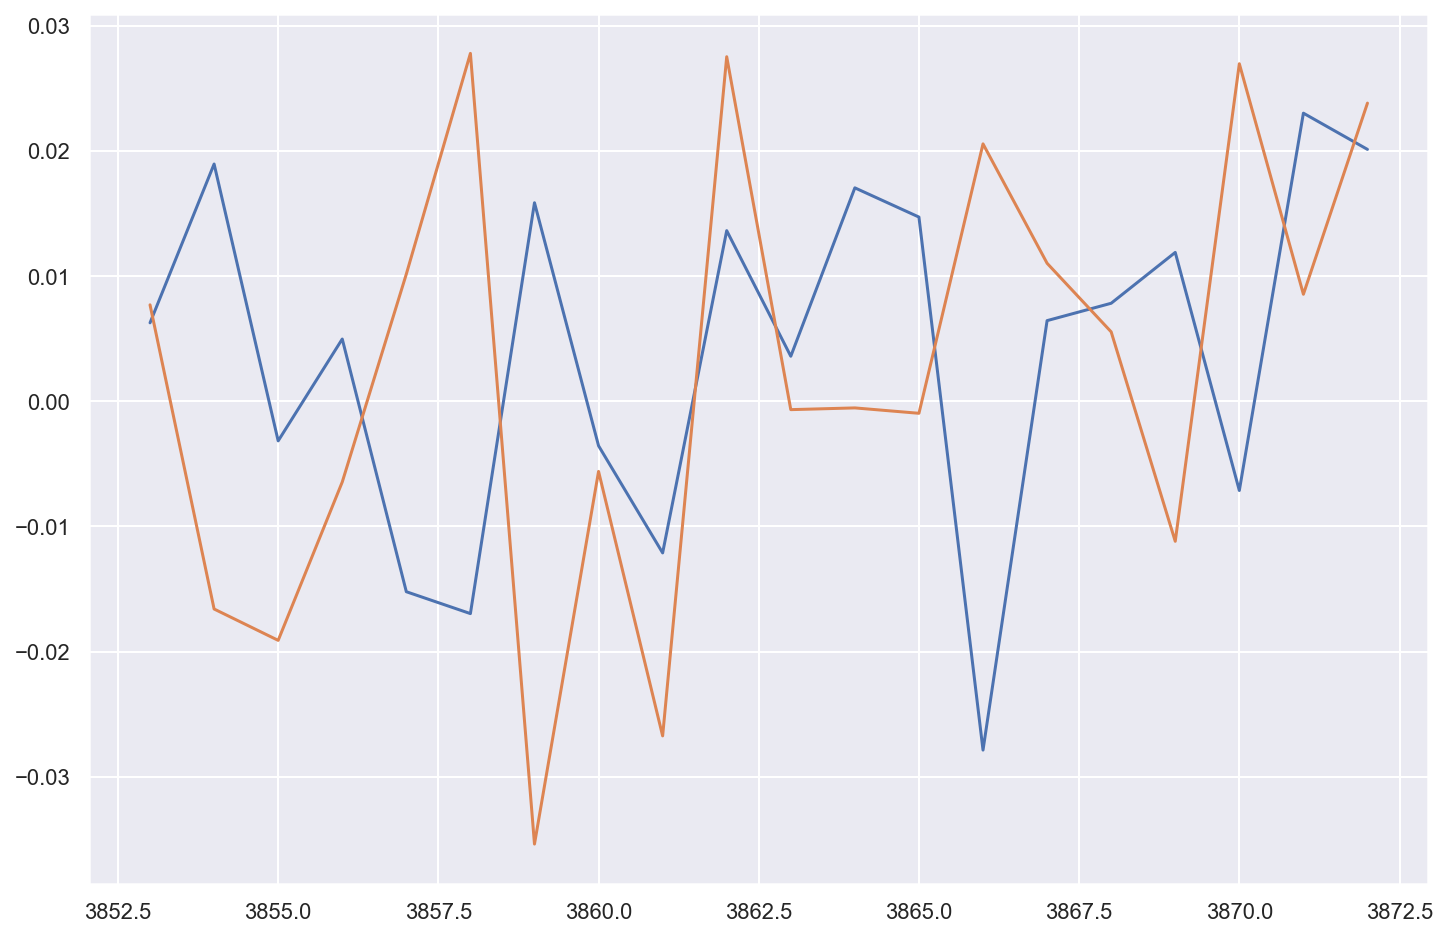

In [19]:
h = 20

arima_one_forecast = arima_one.predict(h)['Series']
arima_two_forecast = arima_two.predict(h)['Series']
garch_forecast = garch.predict(h)['Series']

model_one_prediction = predict(arima_one_forecast, garch_forecast, h)
model_two_prediction = predict(arima_one_forecast, garch_forecast, h)

ax = sns.lineplot(data=model_one_prediction)
sns.lineplot(data=model_two_prediction, ax=ax);